<a href="https://colab.research.google.com/github/kurkur19/Neural_networks_Al_Khmuz_BS_25/blob/main/2lab_NN_Al_Khmuz_BS_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ПРАКТИЧНА РОБОТА №2
######МЕТОДИ ОПТИМІЗАЦІЇ


###Мета роботи:
ознайомитися із різноманітними методами оптимізації, які використовуються в машинному навчанні, зокрема, в області нейронних мереж.

##Теоретична частина

***Оптимізація*** - це процес пошуку
найкращих (або, точніше кажучи, "оптимальних") параметрів для конкретної
моделі або системи.

Методи оптимізації можна грубо поділити на дві основні категорії:
*градієнтні* методи і *неградієнтні* методи.

***Градієнтні методи оптимізації*** використовують градієнт функції втрат, щоб
визначити, в якому напрямку потрібно змінити параметри моделі, щоб
мінімізувати втрати. Найпростіший градієнтний метод - це градієнтний спуск, але
існує багато його варіацій, включаючи стохастичний градієнтний спуск (SGD),
градієнтний спуск з імпульсом (Momentum), RMSprop, Adam та інші.


***Неградієнтні методи оптимізації*** не використовують градієнт функції втрат.
Замість цього вони пошукають оптимальні параметри, використовуючи інші
методи. Наприклад, симуляційне відпалювання (Simulated Annealing)
використовує випадковий пошук з поступовим зменшенням "температури" для
знаходження оптимуму. Генетичні алгоритми використовують механізми
еволюції, такі як мутація, кросинговер і відбір, для пошуку оптимальних рішень.
Деякі інші методи включають Пошук за зразком (Pattern Search), Метод рою
частинок (Particle Swarm Optimization), алгоритми оптимізації на основі колонії
мурах (Ant Colony Optimization algorithms) та багато інших.

***Градієнтний спуск*** є одним із найпростіших і найбільш широко
використовуваних алгоритмів оптимізації, який шукає мінімуми
диференційованої функції. Ідея полягає в тому, щоб робити невеликі кроки в
напрямку найшвидшого спадання функції, який задається градієнтом функції в
даній точці.

***Лінійна регресія*** це простий метод
машинного навчання, який передбачає вивчення лінійних відносин між цільовою
змінною y і однією або більше змінними x.

MSE - Mean Squared Error(середньоквадратична помилка)

**MSE = (1/n) * Σ(actual - prediction)²**

де:

"actual" – це дійсне значення змінної,

"prediction" – це передбачене значення, яке обчислюється як mx + b

"n" – це кількість спостережень у даних

Ця функція втрат відображає середній квадрат відхилення передбачених значень
від фактичних. Чим менше значення MSE, тим краща модель передбачає дані.

##Практична частина

Виконати завдання трьома способами: градієнтним спуском, методом Hill
Climbing, генетичним алгоритмом. Проаналізувати ефективність роботи кожного
з алгоритмів: отримана точність, кількість ітерацій для отримання бажаної
точності, необхідні ресурси, тощо.

Я, Аль Хмуз Карина Бассамівна, маю перший варіант, тому ось мій приклад:


**Експоненційна функція: y = 3*exp(x) + noise**

"noise" – це деякий випадковий шум, який ви додаєте до функції, щоб зробити
дані менш ідеальними і більш схожими на реальні дані, з якими ви могли б
зустрітися в практичних ситуаціях. Наприклад, ви можете використовувати
np.random.normal(loc=0.0, scale=0.1, size=x.shape) для додавання гаусового шуму
з середнім значенням 0 і стандартним відхиленням 0.1.
Контрольні питання

Давайте приступимо до виконання нашої лабораторної роботи:

Створимо дані з експоненційною функцією

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

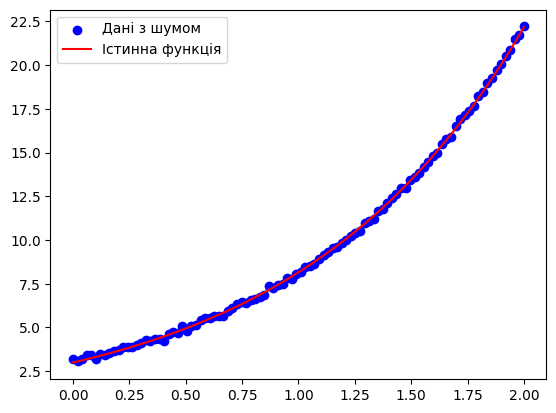

In [35]:
# Генеруємо дані
np.random.seed(0)  # Для відтворюваності
x = np.linspace(0, 2, 100)
noise = np.random.normal(loc=0.0, scale=0.1, size=x.shape)
y_true = 3 * np.exp(x)  # Істинне значення
y = y_true + noise  # Додаємо шум

# Візуалізація даних
plt.scatter(x, y, label='Дані з шумом', color='blue')
plt.plot(x, y_true, label='Істинна функція', color='red')
plt.legend()
plt.show()


У цьому коді ми генеруємо експоненційну функцію виду
y=3*exp(x), до якої додається випадковий шум. Це імітує реальні дані, де завжди є якась похибка або шум. На графіку ми бачимо:

Синю лінію — це точки з шумом, які імітують "реальні" дані.

Червону лінію — це справжнє (ідеальне) значення функції без шуму.

###Градієнтний спуск

Тут ми намагатимемось мінімізувати середньоквадратичну помилку (MSE).

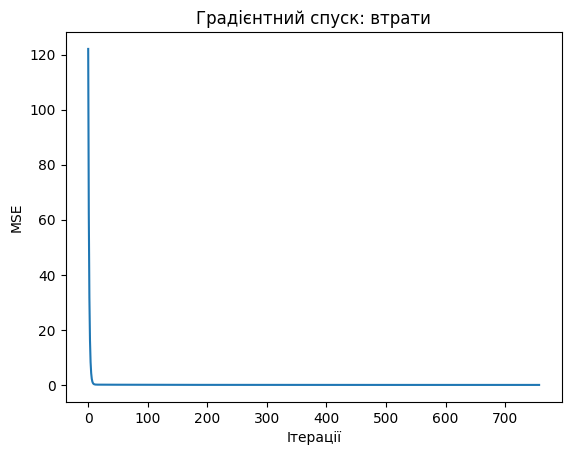

In [36]:
def gradient_descent(x, y, lr=0.01, epochs=1000):
    m = 0.0  # Параметр для експоненційної функції
    b = 0.0  # Зсув
    n = len(y)
    losses = []

    for epoch in range(epochs):
        y_pred = m * np.exp(x) + b
        loss = np.mean((y_pred - y) ** 2)
        losses.append(loss)

        # Оновлюємо m та b
        dm = (2/n) * np.sum((y_pred - y) * np.exp(x))
        db = (2/n) * np.sum(y_pred - y)
        m -= lr * dm
        b -= lr * db

        # Зупиняємо, якщо зміна мала
        if epoch > 1 and abs(losses[-2] - losses[-1]) < 1e-6:
            break

    return m, b, losses

m_gd, b_gd, losses_gd = gradient_descent(x, y)

# Візуалізуємо результати
plt.plot(losses_gd)
plt.title('Градієнтний спуск: втрати')
plt.xlabel('Ітерації')
plt.ylabel('MSE')
plt.show()


Квадратний графік показує те, як змінюється значення середньоквадратичної помилки (MSE) з кожною ітерацією. Чим менше значення помилки, тим точніше модель.

Графік починається з великого значення помилки і поступово знижується, оскільки градієнтний спуск з кожною ітерацією наближається до оптимальних параметрів моделі. В ідеалі, коли лінія стає майже горизонтальною, це означає, що алгоритм досяг мінімуму помилки.

**АЛЕ**

Можна побачити, що цей графік виглядає так, наче що після нульової або першої ітерації графік майже повністю вирівнявся.

Давайте розберемомося:

На початкових ітераціях градієнтний спуск, зазвичай, робить великі зміни, щоб швидко зменшити помилку, а потім, ближче до мінімуму, кроки стають меншими. Тому графік повинен виглядати як спадаюча крива. Але в нас це трохи по іншому виглядає.

Це може свідчити про наступне:

Алгоритм занадто швидко навчається, можливо через занадто великий навчальний крок (learning rate). Якщо крок занадто великий, градієнтний спуск може швидко досягти мінімуму або навіть перескочити його.

Якщо MSE дуже швидко зменшується і не змінюється після цього, це означає, що алгоритм швидко знайшов оптимальне рішення, але подальші ітерації не приносять значних покращень.

Але чи зміниться наш результат при такому виконанні? Мені стало це цікавим, тому я вирішила це перевірити у Додатку А (в кінці роботи).

###Метод Hill Climbing

Hill Climbing працює, шукаючи покращення параметрів в кожній ітерації.

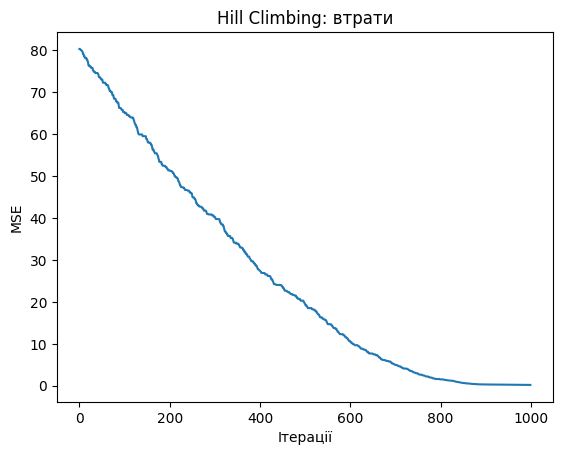

In [37]:
def hill_climbing(x, y, lr=0.01, epochs=1000):
    m = np.random.rand()
    b = np.random.rand()
    n = len(y)
    losses = []

    for epoch in range(epochs):
        y_pred = m * np.exp(x) + b
        loss = np.mean((y_pred - y) ** 2)
        losses.append(loss)

        # Створюємо нові можливі зміни параметрів
        m_new = m + np.random.uniform(-lr, lr)
        b_new = b + np.random.uniform(-lr, lr)
        y_pred_new = m_new * np.exp(x) + b_new
        loss_new = np.mean((y_pred_new - y) ** 2)

        # Приймаємо нові параметри, якщо покращення
        if loss_new < loss:
            m = m_new
            b = b_new

    return m, b, losses

m_hc, b_hc, losses_hc = hill_climbing(x, y)

# Візуалізуємо результати
plt.plot(losses_hc)
plt.title('Hill Climbing: втрати')
plt.xlabel('Ітерації')
plt.ylabel('MSE')
plt.show()


У випадку з Hill Climbing ми бачимо спадаючу лінію на графіку. Це теж показник середньоквадратичної помилки (MSE) з кожною ітерацією:

На початку алгоритм випадковим чином шукає нові варіанти параметрів, тому помилка може бути досить великою.

Потім, поступово, алгоритм знаходить більш оптимальні значення, тому помилка зменшується. Проте Hill Climbing може застрягати у локальних мінімумах, тому графік не обов'язково досягне найнижчого можливого значення, як у випадку з градієнтним спуском.

###Генетичний алгоритм

Цей метод використовує еволюційні принципи: вибір, схрещування, мутацію.

In [38]:
from scipy.optimize import differential_evolution

def fitness_function(params):
    m, b = params
    y_pred = m * np.exp(x) + b
    return np.mean((y_pred - y) ** 2)

bounds = [(0, 10), (0, 10)]  # Межі для параметрів
result = differential_evolution(fitness_function, bounds)

m_ga, b_ga = result.x
loss_ga = result.fun

print(f"Генетичний алгоритм: m = {m_ga}, b = {b_ga}, MSE = {loss_ga}")


Генетичний алгоритм: m = 3.0007129118261413, b = 0.0037138231266155173, MSE = 0.010156514822918345



b=0.0037 — це оптимальні значення параметрів моделі, які генетичний алгоритм знайшов. Значення
𝑚
дуже близьке до справжнього значення (3), що говорить про точність алгоритму.
MSE = 0.01016 — це значення середньоквадратичної помилки, яке також вказує на високу точність результатів генетичного алгоритму.

У цьому випадку ми не маємо графіка, оскільки генетичний алгоритм використовує інший підхід, але ключовим є саме значення параметрів
𝑚
та
𝑏 і похибка (MSE), які свідчать про успішне виконання алгоритму.

###Порівняння методів

Тепер ми можемо порівняти всі методи:

In [39]:
methods = ['Градієнтний спуск', 'Hill Climbing', 'Генетичний алгоритм']
losses = [losses_gd[-1], losses_hc[-1], loss_ga]
iterations = [len(losses_gd), len(losses_hc), result.nit]

for method, loss, iters in zip(methods, losses, iterations):
    print(f"{method}: MSE = {loss}, Ітерацій = {iters}")


Градієнтний спуск: MSE = 0.01026418599122882, Ітерацій = 758
Hill Climbing: MSE = 0.1903706777861176, Ітерацій = 1000
Генетичний алгоритм: MSE = 0.010156514822918345, Ітерацій = 22


***Градієнтний спуск*** показав високий рівень точності (MSE = 0.010264) за 758 ітерацій. Завдяки зменшеному кроку навчання (learning rate = 0.001) ми отримали плавніший графік, який показує поступове зниження помилки. Це свідчить про те, що алгоритм поступово наближався до мінімуму, уникаючи великих стрибків. Градієнтний спуск є ефективним і стабільним методом, але може потребувати більше ітерацій для точного результату при невеликому кроці.

***Hill Climbing*** виявився менш ефективним у порівнянні з іншими методами, отримавши значно більшу похибку (MSE = 0.19037). Це пов’язано з тим, що цей алгоритм може легко застрягати у локальних мінімумах і не гарантує глобальної оптимізації. Навіть після 1000 ітерацій результат не зміг досягти високої точності, що робить Hill Climbing менш ефективним для даного завдання.

***Генетичний алгоритм*** продемонстрував чудову ефективність, досягнувши найнижчого значення похибки (MSE = 0.01016) і зробивши це всього за 22 ітерації. Це показує його здатність швидко знаходити глобальне рішення навіть у складних умовах з шумом. Однак, слід зазначити, що генетичні алгоритми можуть бути ресурсомісткими, особливо для великих наборів даних.

##Висновок

Градієнтний спуск та генетичний алгоритм показали майже однакову точність, проте генетичний алгоритм виявився значно швидшим за кількістю ітерацій. Hill Climbing виявився менш ефективним, що вказує на його слабкість при роботі з функціями, що мають багато локальних мінімумів. Для задач, де точність і швидкість є критично важливими, генетичний алгоритм виглядає найкращим вибором, тоді як градієнтний спуск є надійним, але повільнішим рішенням.

##Контрольні питання

*1. Що таке градієнтний спуск і для чого він використовується?*


Градієнтний спуск — це оптимізаційний алгоритм, який використовується для знаходження мінімуму функції. У контексті машинного навчання він застосовується для навчання моделей, коригуючи їх параметри (ваги та зсуви) таким чином, щоб зменшити похибку, вимірювану функцією втрат. Градієнтний спуск дозволяє знаходити оптимальні значення параметрів, що покращує точність прогнозів моделі.

*2.Які основні складові градієнтного спуску?*



Основні складові градієнтного спуску:

Параметри моделі: Значення, що налаштовуються (ваги, зсуви).
Функція втрат: Оцінює точність моделі.
Градієнт: Вказує напрямок зміни параметрів.
Швидкість навчання: Контролює розмір кроку при оновленні.
Ітерації: Кількість проходів через навчальні дані.

*3. Що таке швидкість навчання в контексті градієнтного спуску? Як вона
впливає на процес оптимізації?*

Швидкість навчання (learning rate) в контексті градієнтного спуску — це гіперпараметр, який визначає, на скільки зміщуються параметри моделі в напрямку градієнта під час кожного оновлення.

Вплив на процес оптимізації:

Висока швидкість навчання: Може призвести до швидкого сходження, але є ризик "перескочити" оптимальне значення або навіть вивести алгоритм з зони збіжності.

Низька швидкість навчання: Гарантує більш точні оновлення параметрів, але процес навчання може бути повільним і вимагати більше ітерацій для досягнення оптимального рішення.

Таким чином, правильний вибір швидкості навчання критично важливий для ефективності та стабільності алгоритму градієнтного спуску.

*4. Як градієнтний спуск впорядковує параметри моделі?*


Градієнтний спуск впорядковує параметри моделі, обчислюючи градієнт функції втрат і оновлюючи параметри в напрямку, протилежному градієнту, щоб зменшити втрати. Цей процес повторюється, поки не буде досягнуто оптимальних значень параметрів.

*5. Чому градієнтний спуск є одним з найпоширеніших методів оптимізації?*

Градієнтний спуск є одним з найпоширеніших методів оптимізації, оскільки він простий у реалізації, ефективно працює з великими даними, застосовується до різних моделей машинного навчання і має можливість налаштування. Крім того, він здатний сходитися до оптимальних значень функції втрат і має багато варіацій, що дозволяє адаптувати його під конкретні задачі.

*6. Як обрати метод оптимізації для конкретної задачі?*

Для вибору методу оптимізації для конкретної задачі слід врахувати наступні фактори:

Тип задачі: чи є данна задача мінімізацією чи максимізацією, а також чи є вона континуальною чи дискретною.

Природа функції: треба проаналізувати, чи є функція гладкою, диференційованою, чи містить вона багато локальних мінімумів.

Швидкість та ефективність: оцінити, скільки ресурсів (часу, пам'яті) потрібно для виконання алгоритму. Деякі методи, як градієнтний спуск, швидко сходяться, але можуть потрапляти в локальні мінімуми.

Параметри задачі: визначити, чи ми можемо використовувати градієнти (методи, які їх вимагають) чи потрібно працювати без них (евристичні методи).

Значення точності: визначити, наскільки критичною є точність результату для нашої задачі.


##Додаток А

Давайте зменшимо learning rate (наприклад, замість 0.01 використаємо 0.001) і запустимо алгоритм ще раз. Це дозволить нашому графіку бути більш плавним і показати поступове зменшення помилки.

Кількість ітерацій залишимо такою ж (758)

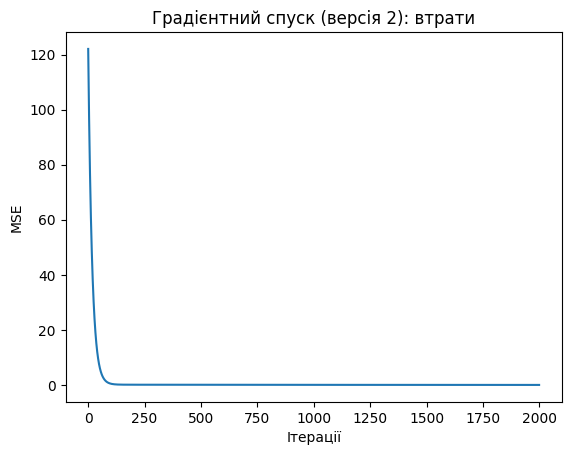

In [43]:
def gradient_descent_v2(data_x, data_y, learning_rate=0.001, max_epochs=2000):
    slope = 0.0  # Параметр для експоненційної функції
    intercept = 0.0  # Зсув
    n = len(data_y)
    error_history = []

    for epoch in range(max_epochs):
        predicted_y = slope * np.exp(data_x) + intercept
        error = np.mean((predicted_y - data_y) ** 2)
        error_history.append(error)

        # Оновлюємо slope та intercept
        dslope = (2/n) * np.sum((predicted_y - data_y) * np.exp(data_x))
        dintercept = (2/n) * np.sum(predicted_y - data_y)
        slope -= learning_rate * dslope
        intercept -= learning_rate * dintercept

        # Зупиняємо, якщо зміна мала
        if epoch > 1 and abs(error_history[-2] - error_history[-1]) < 1e-6:
            break

    return slope, intercept, error_history

# Викликаємо нову функцію градієнтного спуску
slope_gd_v2, intercept_gd_v2, error_history_gd_v2 = gradient_descent_v2(x, y)

# Візуалізуємо результати
plt.plot(error_history_gd_v2)
plt.title('Градієнтний спуск (версія 2): втрати')
plt.xlabel('Ітерації')
plt.ylabel('MSE')
plt.show()


Можна побачити, що наш графік дійсно змінився у нижньому лівому куті. Тепер ми можемо побачити ту саму плавність. Справа в тому, що градієнтний спуск дуже чутливий до таких параметрів, як learning rate та кількість ітерацій.

І тепер давайте перевіримо, як це повпливало на наші результати:

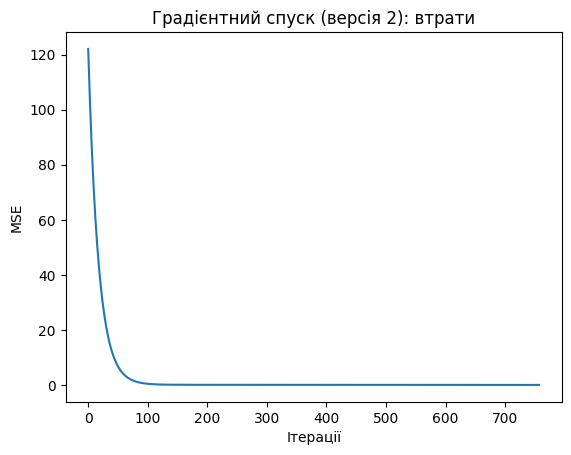

Градієнтний спуск (версія 2):
Остаточне MSE: 0.06599069431593751
Кількість ітерацій для досягнення бажаної точності: 758


In [51]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent_v2(data_x, data_y, learning_rate=0.001, max_epochs=758, target_mse=0.01):
    slope = 0.0  # Параметр для експоненційної функції
    intercept = 0.0  # Зсув
    n = len(data_y)
    error_history = []

    for epoch in range(max_epochs):
        predicted_y = slope * np.exp(data_x) + intercept
        error = np.mean((predicted_y - data_y) ** 2)
        error_history.append(error)

        # Оновлюємо slope та intercept
        dslope = (2/n) * np.sum((predicted_y - data_y) * np.exp(data_x))
        dintercept = (2/n) * np.sum(predicted_y - data_y)
        slope -= learning_rate * dslope
        intercept -= learning_rate * dintercept

        # Зупиняємо, якщо зміна мала або досягнуто бажаної точності
        if epoch > 1 and abs(error_history[-2] - error_history[-1]) < 1e-6:
            break
        if error < target_mse:
            break

    return slope, intercept, error_history, epoch + 1

# Викликаємо нову функцію градієнтного спуску
slope_gd_v2, intercept_gd_v2, error_history_gd_v2, iterations_gd_v2 = gradient_descent_v2(x, y)

# Візуалізуємо результати
plt.plot(error_history_gd_v2)
plt.title('Градієнтний спуск (версія 2): втрати')
plt.xlabel('Ітерації')
plt.ylabel('MSE')
plt.show()

# Виводимо результати
print(f"Градієнтний спуск (версія 2):")
print(f"Остаточне MSE: {error_history_gd_v2[-1]}")
print(f"Кількість ітерацій для досягнення бажаної точності: {iterations_gd_v2}")


У першій версії коду з learning rate = 0.01 і 758 ітераціями ми отримали результат з хорошою точністю за меншу кількість ітерацій. Проте збільшення learning rate може призводити до нерегулярного зменшення помилки (осциляцій), оскільки алгоритм робить занадто великі кроки.

У другій версії ми зменшила learning rate до 0.001 і залишили кількість ітерацій 758. Це зробило графік більш плавним, але результат MSE трохи погіршився, що є природнім, оскільки зменшена швидкість навчання означає, що алгоритм робить дуже маленькі кроки і не встигає досягти такого ж рівня точності за меншу кількість ітерацій.